In [2]:
import numpy as np
import matplotlib.pyplot as plt

/var/folders/sl/tj9x552d27vft1rr9h0v5s4m0000gn/T/ipykernel_3305/1719743051.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


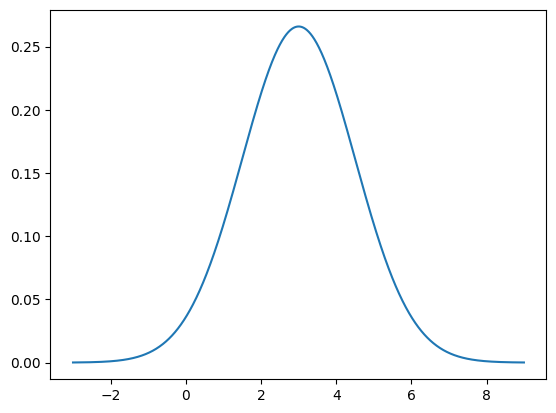

In [3]:
mu = 3
sigma = 1.5

x = np.arange(start=-3, stop=9, step=0.01)
y = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-((x-mu)/sigma)**2/2)
fig1, ax1 = plt.subplots()
ax1.plot(x, y, linestyle="-")
fig1.show()

/var/folders/sl/tj9x552d27vft1rr9h0v5s4m0000gn/T/ipykernel_3305/3264038510.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


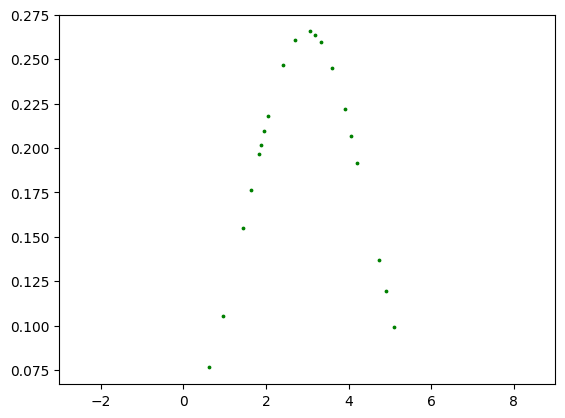

In [4]:
# sample from the normal dist
sample_size = 20
rng = np.random.default_rng(seed=2023)
samplex = rng.normal(loc=3, scale=sigma, size=sample_size)
sampley = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-((samplex-mu)/sigma)**2/2)

fig2, ax2 = plt.subplots()
ax2.scatter(samplex, sampley, c='g', s=3)
ax2.set_xlim(left=-3, right=9)
fig2.show()

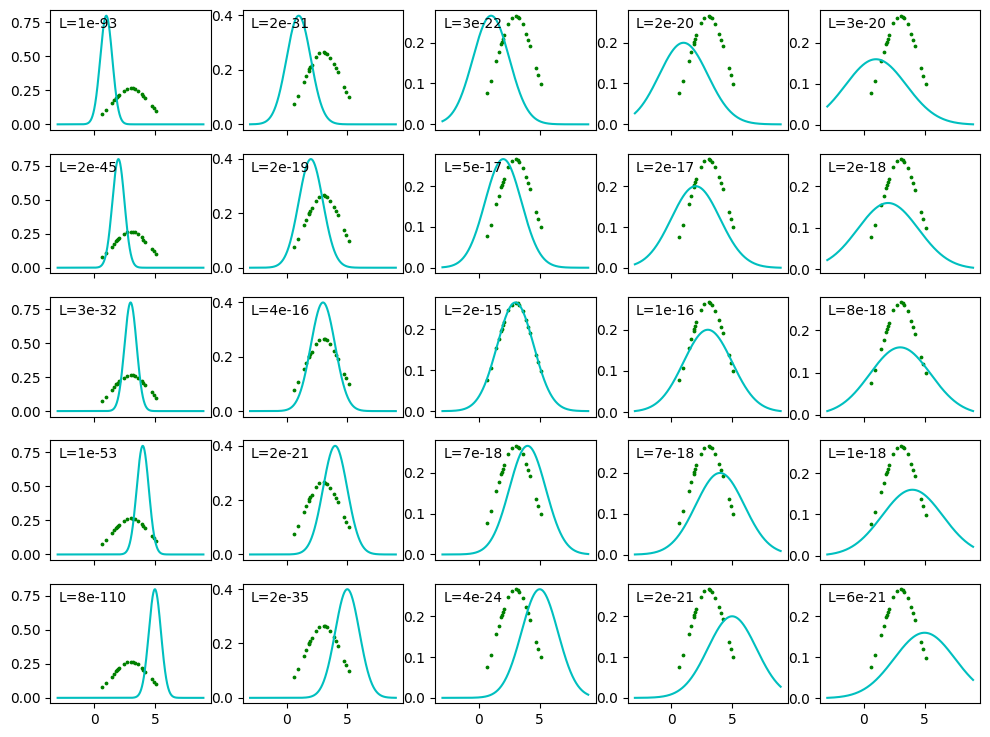

In [5]:
mu_test = np.arange(start=1, stop=6, step=1)
sigma_test = np.arange(start=0.5, stop=3, step=0.5)
nmu = len(mu_test)
nsig = len(sigma_test)

def ynormal(mu, sigma, x):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-((x-mu)/sigma)**2/2)

def get_likelihood(mu, sigma, x):
    y = ynormal(mu, sigma, x)
    return y.prod()

fig3, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(12, 9))
likelihood = np.zeros([nmu, nsig])
for i, mu_i in enumerate(mu_test):
    for j, sig_j in enumerate(sigma_test):
        axes[i,j].scatter(samplex, sampley, c='g', s=3)
        axes[i,j].plot(x, ynormal(mu_i, sig_j, x=x), c='c')
        likelihood[i, j] = get_likelihood(mu_i, sig_j, samplex)
        # textstr = '\n'.join((r'$\mu=%.2f$' % (mu, ), r'$\sigma=%.2f$' % (sigma, ), r'$\mathrm{median}=%.2f$' % (likelihood[i, j], )))
        textstr = 'L={:.0e}'.format(likelihood[i, j])
        axes[i, j].text(0.05, 0.85, textstr, transform=axes[i, j].transAxes) # print the likelihood on the axis
# print(likelihood)

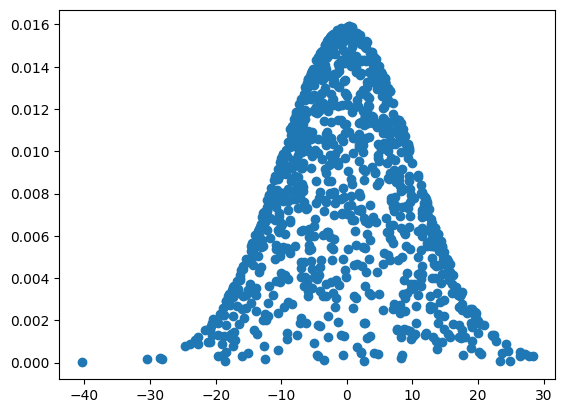

In [68]:
# incorrect simulation of the sum of two independent normal distributions
x = rng.normal(-5, 1, size=1000)
pdfx = ynormal(-5, 1, x)
y = rng.normal(5, 10, size=1000)
pdfy = ynormal(5, 10, y)

z = x + y
pdfz = pdfx*pdfy
fig4, ax4 = plt.subplots()
ax4.scatter(z, pdfz)

(array([0.00260329, 0.        , 0.        , 0.00130164, 0.00130164,
        0.        , 0.00390493, 0.00260329, 0.00130164, 0.        ,
        0.00520657, 0.00390493, 0.00650822, 0.00650822, 0.00780986,
        0.0091115 , 0.00650822, 0.01952465, 0.02082629, 0.01822301,
        0.02473122, 0.03644602, 0.03774766, 0.04035095, 0.04425588,
        0.04946245, 0.06508217, 0.07289203, 0.08721011, 0.10152819,
        0.1080364 , 0.11844955, 0.14968899, 0.13276763, 0.15099063,
        0.17051529, 0.2069613 , 0.2368991 , 0.2368991 , 0.26944018,
        0.2668369 , 0.27985333, 0.30328291, 0.32801414, 0.34623715,
        0.36185687, 0.37617494, 0.40090617, 0.36055522, 0.41131932,
        0.4347489 , 0.3839848 , 0.37747659, 0.39179466, 0.37617494,
        0.38528645, 0.39960453, 0.35665029, 0.32150592, 0.36966673,
        0.28636155, 0.29286977, 0.2759484 , 0.26553525, 0.24861389,
        0.20956459, 0.18223008, 0.18873829, 0.14578406, 0.16140378,
        0.14838735, 0.1288627 , 0.12365612, 0.08

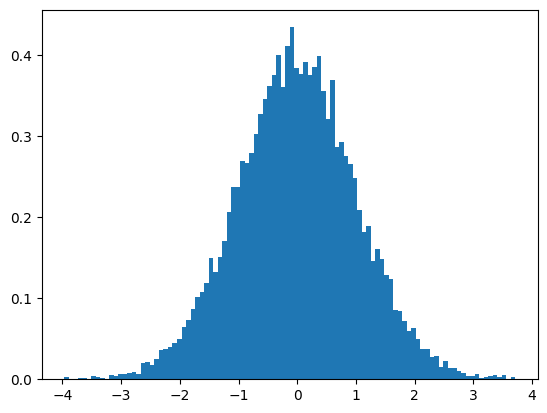

In [72]:
# visualize t distribution
tx = rng.standard_t(df=100, size=10000)
plt.hist(tx, bins=100, density=True)